# The Economics of gunshots in DC

Yazeed Alhudhaif 

CMSC320

Final Tutorial Project

Dec-2022

## Introduction 

In the summer, I was attending program at ASU Tempe, and I was walking one night at 3 AM around the University a saw a lot of cops and apparently a shotting happend in the street next to me. Then I started using the Citizen app and I started getting netifigations on things happining around me from that I was inspired how could I use the information to stay away from dangurous areas  

In this project I wanted to look over the shotting in DC area and when and where do they happen. I got the idea after project four when implementing a map with icons I used the same dataset and I noticed that it takes a lot of time to plot all the data so I was forced to filter. Moreover, I noticed an empty space in the map and I wondered why no shotting are happening there?

hypothesis:
We believe that shottings are more prone in times where less people people are 

*   We believe that shottings are more prone in times where less people people are  awake.
*   We believe that areas with higher incmoe are less prone to shottings. 





## Data

We start by importing Python pacages the we are going to use in our analysis



*   Folium: is a library in Python that lets us quickly create maps and adjust add on.
 https://medium.com/mlearning-ai/introduction-to-folium-in-python-515fc795800f
*   pandas: is python package that is fast, powerful, flexible and easy to use open source data analysis and manipulation tool.
 https://pandas.pydata.org
*   numpy: The fundamental package for scientific computing with Python https://numpy.org
*   matplotlib.pyplot:  is a state-based interface to matplotlib. It provides an implicit, MATLAB-like, way of plotting. It also opens figures on your screen, and acts as the figure GUI manager.
https://matplotlib.org/stable/api/pyplot_summary.html
*   mpl_toolkits.mplot3d: adds simple 3D plotting capabilities (scatter, surface, line, mesh, etc.) https://matplotlib.org/stable/api/toolkits/mplot3d.html





In [43]:
import folium
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

### Shot Spotter Gun Shots
Shot Spotter Gun Shots data set is in csv file. The file was downloaded from DC open data website https://opendata.dc.gov/datasets/DCGIS::shot-spotter-gun-shots/explore?location=38.892374%2C-76.965984%2C12.91. One thing worh noting that the data is collected using sensors that are located in areas that are prone to shottings so some areas could have less info. We can easily import the data to a dataframe by reading the file using pandas.


In [44]:
shot_table = pd.read_csv("Shot_Spotter_Gun_Shots.csv")

shot_table

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,X,Y,OBJECTID,ID,TYPE,SOURCE,LATITUDE,LONGITUDE,DATETIME,AUTOACKNOWLEDGED,INDC,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED
0,-77.002,38.916,40001,5D39821,Single_Gunshot,WashingtonDC5D,38.916,-77.002,2014/01/01 06:18:00+00,NaN,NaN,ShotSpotter_40001,{A5E91420-1F32-4855-9D4E-9812531F96B9},JLAY,2021/03/10 21:45:53+00,DCGIS,2021/03/11 03:09:22+00
1,-77.000,38.823,40002,7D119445,Multiple_Gunshots,WashingtonDC7D,38.823,-77.000,2014/01/01 05:00:10+00,NaN,NaN,ShotSpotter_40002,{4E43448E-FBA5-49FF-B58B-86B2E3825FC6},JLAY,2021/03/10 21:45:53+00,DCGIS,2021/03/11 03:09:53+00
2,-76.993,38.893,40003,1D55993,Multiple_Gunshots,WashingtonDC1D,38.893,-76.993,2014/01/01 05:00:10+00,NaN,NaN,ShotSpotter_40003,{7306123A-8090-41B9-8A05-CAAFEB5C7089},JLAY,2021/03/10 21:45:53+00,DCGIS,2021/03/11 03:09:34+00
3,-77.026,38.940,40004,4D34326,Multiple_Gunshots,WashingtonDC4D,38.940,-77.026,2014/01/01 05:00:11+00,NaN,NaN,ShotSpotter_40004,{CB4CCF70-1552-4A16-BC48-6004EE59F487},JLAY,2021/03/10 21:45:53+00,DCGIS,2021/03/11 03:10:07+00
4,-76.938,38.890,40005,6D102264,Multiple_Gunshots,WashingtonDC6D,38.890,-76.938,2014/01/01 05:00:12+00,NaN,NaN,ShotSpotter_40005,{EBF9195C-0052-485D-9A4B-ED47A6DCC2F7},JLAY,2021/03/10 21:45:53+00,DCGIS,2021/03/11 03:09:20+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65857,-76.949,38.869,106162,6D52-493490,Single Gunshot,WashingtonDC6D,38.869,-76.949,2022/07/01 01:19:34+00,NaN,True,ShotSpotter_GunshotPt_3762,{C93DDE6E-965D-48CD-A9C1-E4FA152B9838},JLAY,2022/11/02 17:56:37+00,JLAY,2022/11/02 17:56:37+00
65858,-77.003,38.832,106163,7D53-617488,Multiple Gunshots,WashingtonDC7D,38.832,-77.003,2022/07/01 02:52:51+00,NaN,True,ShotSpotter_GunshotPt_3763,{EF189685-9D8B-4BF5-B903-BDCF5B5BB4A0},JLAY,2022/11/02 17:56:37+00,JLAY,2022/11/02 17:56:37+00
65859,-76.966,38.875,106164,6D52-493738,Multiple Gunshots,WashingtonDC6D,38.875,-76.966,2022/07/01 03:03:47+00,NaN,True,ShotSpotter_GunshotPt_3764,{7430C065-8328-41BB-A521-275F382FFEA9},JLAY,2022/11/02 17:56:37+00,JLAY,2022/11/02 17:56:37+00
65860,-76.966,38.875,106165,6D52-493739,Multiple Gunshots,WashingtonDC6D,38.875,-76.966,2022/07/01 03:03:55+00,NaN,True,ShotSpotter_GunshotPt_3765,{CDBFA6D3-9844-4132-88A6-ED5034247B24},JLAY,2022/11/02 17:56:37+00,JLAY,2022/11/02 17:56:37+00


The dataset have a lot of information that could be beneficial for them as data center so we can see who editied the data and when and creation date those kind of information are mainly used to keep track of the data lifespan to keep the integrity of the data safe. 
We wanted to focus on the data that we find beneficial to us so we deleted columns that could make it hard to notice deffrinet things within the dataframe. Also, we added some columns that could help us in the proccessing as the time in the dataset is provided as string. Moreover, we want to processs the data depending on the 8-wards in DC as it helps us see the shotting free areas in DC as a catogories. 

In [45]:
shot_table['datetime'] = pd.to_datetime(shot_table['DATETIME'],
                                        format='%Y/%m/%d %H:%M:%S.%f', utc=True)

shot_table['year'] = shot_table['datetime'].dt.year
shot_table['month'] = shot_table['datetime'].dt.month
shot_table['day'] = shot_table['datetime'].dt.day
shot_table['hour'] = shot_table['datetime'].dt.hour

shot_table['time'] = (shot_table['datetime'].dt.year *1000000 + 
                      shot_table['datetime'].dt.month *10000 +
                      shot_table['datetime'].dt.day*100 +
                        shot_table['datetime'].dt.hour)

shot_table['Number_shots'] = 1

del shot_table['ID']
del shot_table['DATETIME']
del shot_table['AUTOACKNOWLEDGED']
del shot_table['GLOBALID']
del shot_table['CREATOR']
del shot_table['CREATED']
del shot_table['EDITOR']
del shot_table['EDITED']
del shot_table['GIS_ID']
del shot_table['INDC']
del shot_table['X']
del shot_table['Y']
del shot_table['OBJECTID']


shot_table = shot_table.sort_values(by=['year', 'month', 'day', 'hour'])
shot_table = shot_table.reset_index()
del shot_table['index']
#add total shots to plots
total_shots = 1
shot_table['total_shots'] = 0
for i, ele in shot_table.iterrows():
  shot_table.at[i,'total_shots'] = total_shots
  total_shots = total_shots + 1

# Adding wards information to the shot spotter set found from the analysis and median income
shot_table['ward'] = ''
for i, shot in shot_table.iterrows():
      if shot["SOURCE"] == "WashingtonDC1D":  
          shot_table.at[i,'ward'] = 6
      if shot["SOURCE"] == "WashingtonDC3D":
          shot_table.at[i,'ward'] = 1
      if shot["SOURCE"] == "WashingtonDC4D":
          shot_table.at[i,'ward'] = 4
      if shot["SOURCE"] == "WashingtonDC5D":
          shot_table.at[i,'ward'] = 5
      if shot["SOURCE"] == "WashingtonDC6D":
          shot_table.at[i,'ward'] = 7
      if shot["SOURCE"] == "WashingtonDC7D":
        shot_table.at[i,'ward'] = 8

del shot_table['SOURCE']

shot_table

,TYPE,LATITUDE,LONGITUDE,datetime,year,month,day,hour,time,Number_shots,total_shots,ward
0,Multiple_Gunshots,38.823,-77.000,2014-01-01 05:00:10+00:00,2014,1,1,5,2014010105,1,1,8
1,Multiple_Gunshots,38.893,-76.993,2014-01-01 05:00:10+00:00,2014,1,1,5,2014010105,1,2,6
2,Multiple_Gunshots,38.940,-77.026,2014-01-01 05:00:11+00:00,2014,1,1,5,2014010105,1,3,4
3,Multiple_Gunshots,38.890,-76.938,2014-01-01 05:00:12+00:00,2014,1,1,5,2014010105,1,4,7
4,Multiple_Gunshots,38.848,-76.989,2014-01-01 05:00:13+00:00,2014,1,1,5,2014010105,1,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...
65857,Single Gunshot,38.869,-76.949,2022-07-01 01:19:34+00:00,2022,7,1,1,2022070101,1,65858,7
65858,Multiple Gunshots,38.832,-77.003,2022-07-01 02:52:51+00:00,2022,7,1,2,2022070102,1,65859,8
65859,Multiple Gunshots,38.875,-76.966,2022-07-01 03:03:47+00:00,2022,7,1,3,2022070103,1,65860,7
65860,Multiple Gunshots,38.875,-76.966,2022-07-01 03:03:55+00:00,2022,7,1,3,2022070103,1,65861,7


As we can see in the dataframe we have 65862 rows of data and 12 columns. Each of these coumns represent an attribute. 


*   TYPE: Catogrize the shot as Single or Multiple.

*   LATITUDE: Provides the Latitude of where the shot spotted.

*   LONGITUDE: Provides the Longitude of where the shot spotted.

*   datetime: Provides the time in datetime format.

*   year: years ranging from 2014-2022.

*   month: month.

*   Day: day.

*   hour: hour.

*   Time: years and months and days as an int.

*   Number_shots: Number of shot spotted, which is one per spotting.

*   total_shots: Cumiltive number of shots in the data set increasing depending on the time of the shotting.

*   ward: the ward coorisbonding to the area where the shotting spotted.





Here we are creating a new data frame that groups the data depending on the coresponding ward. Also, we added the missing wards in the set which are Ward-2 and Ward-3. Moreover, we added income data for each ward which could be found on https://censusreporter.org/profiles/61000US11008-ward-8-dc/.
Adding two columns 


*   mean_income: The mean income for the poplation living in the ward  
*   median_income: The median  income for the poplation living in the ward  



In [46]:

df_ward = shot_table.groupby(['ward']).sum().reset_index()
df_ward = df_ward.loc[:,['ward', 'Number_shots']]
df_ward = df_ward.append({'ward' : 2, 'Number_shots': 0}, ignore_index=True)
df_ward = df_ward.append({'ward' : 3, 'Number_shots': 0}, ignore_index=True)
mean_income = [73239, 57927, 48517, 78380, 30298, 26634, 93290, 102050]
median_income = [111575, 104944, 84566, 121874, 51627, 38906, 118214, 133750]
df_ward["mean_income"] = mean_income
df_ward["median_income"] = median_income
df_ward = df_word = df_ward.sort_values(by=['ward'])
df_ward

,ward,Number_shots,mean_income,median_income
0,1,3249,73239,111575
6,2,0,93290,118214
7,3,0,102050,133750
1,4,4722,57927,104944
2,5,6672,48517,84566
3,6,4061,78380,121874
4,7,20537,30298,51627
5,8,26621,26634,38906


Here we creating a dataframe grouping by LONGITUDE and LATITUDE, the benefit of that is to create layers to help us plot te behind the plot rather than having them as one dimintion which make them hard to interpatate. 



In [47]:
df_map = shot_table.groupby(['LONGITUDE', 'LATITUDE']).sum().reset_index()
df_map = df_map.loc[:,['LONGITUDE', 'LATITUDE','Number_shots']]
df_map

,LONGITUDE,LATITUDE,Number_shots
0,-77.056,38.883,1
1,-77.051,38.953,2
2,-77.051,38.954,1
3,-77.051,38.962,1
4,-77.050,38.954,1
...,...,...,...
7913,-76.896,38.864,1
7914,-76.895,38.897,1
7915,-76.895,38.898,1
7916,-76.890,38.896,1


## Exploration & Analysis

In our expleoration we are focusing on two main things. 

First: When does the shotting ar more prone to happen?

Second: Where does the shotting ar more prone to happen?

### First: When does the shotting ar more prone to happen?
Here we wanted to see the number of shotting over time so we looked at the number of total shotting over the years. 
As we see below the amount of shots are jumping yearly rather than a line I beleive this could be related to how the data stored as it does not look continous from the graph. Also, the avrage shots per year is around 7148 shots, and we see the reggression line passing the increase of shottings but in 2020 it seems that there is a spike in the number of shottings.

 
0.007148 x - 1.439e+07


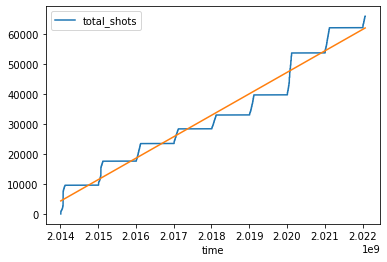

In [48]:
df_location = shot_table.groupby(['LONGITUDE', 'LATITUDE']).sum().reset_index()
cof = np.polyfit(x = shot_table['time'], y = shot_table['total_shots'], deg = 1)
pfun = np.poly1d(cof)
print(pfun)
shot_table.plot(x = 'time', y = 'total_shots')
plt.plot(shot_table['time'], pfun(shot_table['time']))

In the bar graph below we see the number of shottings in each year. We see that the number of shottings from 2014 till 2018 was decreasing then it started increasing with a spike in 2020 which we saw in the graph before. This could be a sign to the events in 2020 that caused that such as the capital raiots and covid-19. 

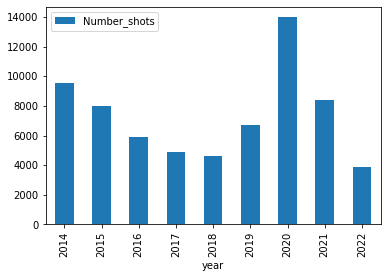

In [49]:
df_year = shot_table.groupby(['year']).sum().reset_index()
df_year.plot(kind = 'bar', x = 'year', y= 'Number_shots')

In the graph below we have the number of shotttings for each month, as we see in July the number of shots are almost double to any other month. 

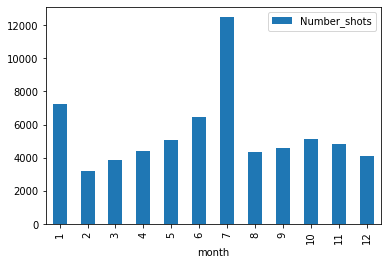

In [50]:
df_month = shot_table.groupby(['month']).sum().reset_index()
df_month.plot(kind = 'bar', x = 'month', y= 'Number_shots')

In the graph below we have the shottings over the hours of the day in the 24 format. We see that from 23 the number of shottings start increasing till it reachs it peaks on 5 in the morning. Which supports that at night the number of shottings are higher as less people are outside in the streets and most of them are asleep.  

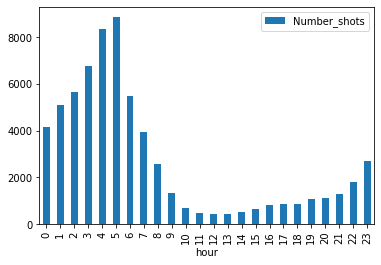

In [51]:
df_hour = shot_table.groupby(['hour']).sum().reset_index()
df_hour.plot(kind = 'bar', x = 'hour', y= 'Number_shots')

### Second: Where does the shotting ar more prone to happen?
Here we started answering the question where does the shottings happen. 
In the graph below we see the plotted on the coordenits. The problem we noticed here that the are some layers in the plot but we do not know the amountr of data at each coordints, which is a problem in scatter plots

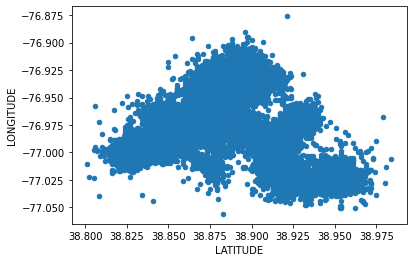

In [52]:
df_map.plot(kind = 'scatter', x = 'LATITUDE', y = 'LONGITUDE')

In this graph we wanted to see the number of shots in each coordints which is easier to see here comparing to the scatter plot which is makes it easier to interpter. As we see here there are locations were more shootings are happing than other. 

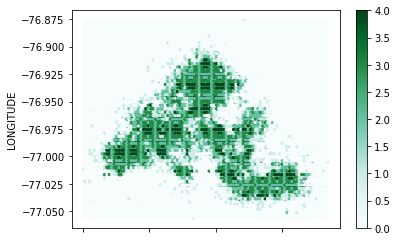

In [53]:
df_map.plot(kind = 'hexbin', x = 'LATITUDE', y = 'LONGITUDE')

In this graph we wanted to take a side view to the shottings locatons giving us a look in the locations. it shows that there are some kind of clusters where shottings happen which could mean that there are certain areas where shotting are more prone to happen.

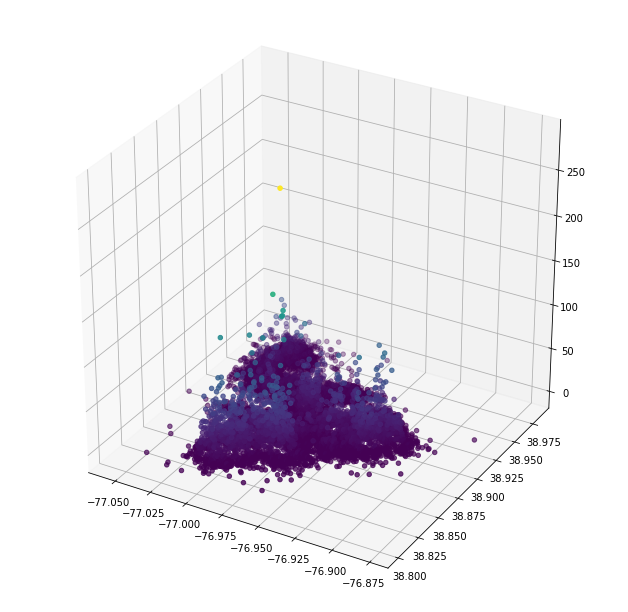

In [54]:
fig = plt.figure(figsize=(11, 11))
ax = plt.axes(projection='3d')
ax.scatter3D(df_map['LONGITUDE'], df_map['LATITUDE'],
             df_map['Number_shots'], c= df_map['Number_shots'])
plt.show()

Here we wanted to focus on the shottings happend in 2022 as it makes it easy to read the maps. We added the icons depending on two thibngs the type of shotting as multiple shottings are more alarming, and the area where the shottings are happenning as colors where each color represent a ward. we noticied the emptyiness in wards 2,3 as there was no shottings spotted in those areas. That means that those areas are less prone to shottings and areas on the east of DC are more prone to shotttings. 

In [55]:
map_osm = folium.Map(location=[38.9, -77.05], zoom_start=11.5)

for index, shot in shot_table[(shot_table['year'] >= 2022)].iterrows():
  if shot["TYPE"] == "Multiple_Gunshots":
      if shot["ward"] == 6:
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='blue', icon="fa-solid fa-layer-group", )).add_to(map_osm)
      if shot["ward"] == 1:
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='black', icon="fa-solid fa-layer-group")).add_to(map_osm)
      if shot["ward"] == 4:
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='gray', icon="fa-solid fa-layer-group")).add_to(map_osm)
      if shot["ward"] == 5:
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='orange', icon="fa-solid fa-layer-group" )).add_to(map_osm)
      if shot["ward"] == 7:
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='pink', icon= "fa-solid fa-layer-group")).add_to(map_osm)
      if shot["ward"] == 8:
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='green', icon="fa-solid fa-layer-group")).add_to(map_osm)
  else:
      if shot["ward"] == 6:  
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='blue')).add_to(map_osm)#ward6
      if shot["ward"] == 1:
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='black')).add_to(map_osm)#ward1
      if shot["ward"] == 4:
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='gray')).add_to(map_osm)#ward4
      if shot["ward"] == 5:
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='orange')).add_to(map_osm)#ward5
      if shot["ward"] == 7:
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='pink')).add_to(map_osm)#ward7
      if shot["ward"] == 8:
          folium.Marker(location=[shot["LATITUDE"], shot["LONGITUDE"]],
                      icon=folium.Icon(color='green')).add_to(map_osm)#ward8
map_osm

Here we wanted to copare the income in the wards to the number of shottings. 
We noticed the the number of shottings in the green bar are higher in wards 7 and 8 which happend to be the lowest income areas. Also, areas with higher income have lower Number of shottings. 

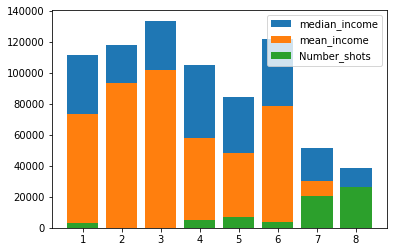

In [56]:
plt.bar(df_ward['ward'], df_ward['median_income'], label = 'median_income')
plt.bar(df_ward['ward'], df_ward['mean_income'], label = 'mean_income')
plt.bar(df_ward['ward'], df_ward['Number_shots'], label = 'Number_shots')
plt.legend()
plt.show()


Here we are testing the correleation between income and number of shots. we notice that the corrleation between the two are negative which means as the income increase the number of shottings decreases. 

In [57]:
df_ward.corr()

,ward,Number_shots,mean_income,median_income
ward,1.000000,0.828399,-0.757193,-0.761568
Number_shots,0.828399,1.000000,-0.893997,-0.963661
mean_income,-0.757193,-0.893997,1.000000,0.950328
median_income,-0.761568,-0.963661,0.950328,1.000000


## Conclusion
Overall we can conclude that the Shotting as an event happens more late at night and early mornnings. Also, that there is a correlation between the income and number of shooting. Moreover, that the number of shottings increased in 2020 where the covid-19 started and a lot of people lost their jobs which could lead to decrese the income of people which is correlated with shottings. That sopports the idea that poor areas are more prone to shottings.
It is important to note that as the data is collected using sensors which are deployed more in lower income areas that could have lead to bias sampling, which could have changed the results of the analysis. 
What we would recommend as future work is to expand on the dataset using smaller areas than wards to see the shottings happenning within wards. Also, to compare shottings depending on demographics of the areas and age groups as that could help to understand why these areas are more prone to shottings. 